In [1]:
from functools import reduce

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
# preds_path_ls = [
#     ('raw 0 shot',   r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\Raw_0sh.bin'),
#     ('raw 5 shot',   r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\Raw_5sh.bin'),
#     ('LoRA 0 shot',  r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\LoRA-cfg17_0sh.bin'),
#     ('LoRA 5 shot',  r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\LoRA-cfg17_5sh.bin'),
#     ('GSOFT_2 0 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg2_0sh.bin'),
#     ('GSOFT_2 5 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg2_5sh.bin'),
#     ('GSOFT_3 0 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg3_0sh.bin'),
#     ('GSOFT_3 5 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg3_5sh.bin'),
#     ('GSOFT_4 0 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg4_0sh.bin'),
#     ('GSOFT_4 5 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg4_5sh.bin'),
#     ('GSOFT_5 0 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg5_0sh.bin'),
#     ('GSOFT_5 5 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg5_5sh.bin'),
# ]

In [3]:
preds_path_ls = [
    ('LoRA', 'EN_US',  r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\LoRA-cfg17_0sh.bin'),
    ('Raw', 'EN_US',  r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\Raw_0sh.bin'),
    ('GSOFT-3', 'EN_US',  r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg3_0sh.bin'),
    ('GSOFT-4', 'EN_US',  r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg4_0sh.bin'),
]

langs = ('AR_XY', 'BN_BD', 'DE_DE', 'ES_LA', 'FR_FR', 'HI_IN', 'ID_ID', 'IT_IT', 'JA_JP', 'KO_KR', 'PT_BR')

preds_path_ls += [
    (f'LoRA', lang, rf'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\MMMLU\LoRA-cfg17\{lang}.bin')
    for lang in langs
]

preds_path_ls += [
    (f'Raw', lang, rf'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\MMMLU\Raw\{lang}.bin')
    for lang in langs
]

preds_path_ls += [
    (f'GSOFT-3', lang, rf'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\MMMLU\GSOFT-cfg3\{lang}.bin')
    for lang in langs
]

preds_path_ls += [
    (f'GSOFT-4', lang, rf'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\MMMLU\GSOFT-cfg4\{lang}.bin')
    for lang in langs
]

In [4]:
preds_dfs = []

for run_name, lang, preds_path in preds_path_ls:
    with open(preds_path, 'rb') as f:
        preds_df = pickle.load(file=f)

    preds_df.loc[:, 'run'] = run_name
    preds_df.loc[:, 'language'] = lang
    preds_dfs.append(preds_df)

    print(f"{run_name:16}, {lang:5}: {preds_df.shape=}")

LoRA            , EN_US: preds_df.shape=(14042, 8)
Raw             , EN_US: preds_df.shape=(14042, 8)
GSOFT-3         , EN_US: preds_df.shape=(14042, 8)
GSOFT-4         , EN_US: preds_df.shape=(14042, 8)
LoRA            , AR_XY: preds_df.shape=(14042, 8)
LoRA            , BN_BD: preds_df.shape=(14042, 8)
LoRA            , DE_DE: preds_df.shape=(14042, 8)
LoRA            , ES_LA: preds_df.shape=(14042, 8)
LoRA            , FR_FR: preds_df.shape=(14042, 8)
LoRA            , HI_IN: preds_df.shape=(14042, 8)
LoRA            , ID_ID: preds_df.shape=(14042, 8)
LoRA            , IT_IT: preds_df.shape=(14042, 8)
LoRA            , JA_JP: preds_df.shape=(14042, 8)
LoRA            , KO_KR: preds_df.shape=(14042, 8)
LoRA            , PT_BR: preds_df.shape=(14042, 8)
Raw             , AR_XY: preds_df.shape=(14042, 8)
Raw             , BN_BD: preds_df.shape=(14042, 8)
Raw             , DE_DE: preds_df.shape=(14042, 8)
Raw             , ES_LA: preds_df.shape=(14042, 8)
Raw             , FR_FR: preds_

In [5]:
preds_dfs[0].head()

,generated_text,subject,pred,true,corr,category,run,language
0,D. 6,abstract_algebra,D,B,0,STEM,LoRA,EN_US
1,D. 120,abstract_algebra,D,C,0,STEM,LoRA,EN_US
2,The given polynomial is,abstract_algebra,I,D,0,STEM,LoRA,EN_US
3,"A. True,",abstract_algebra,A,B,0,STEM,LoRA,EN_US
4,B. 6,abstract_algebra,B,B,1,STEM,LoRA,EN_US


In [6]:
preds_df = pd.concat(preds_dfs, axis=0, ignore_index=True)
preds_df.loc[:, 'category'] = preds_df.loc[:, 'category'].apply(lambda s: s.replace('other (business, health, misc.)', 'other'))

print(f"{preds_df.shape=}")

preds_df.head(10)

preds_df.shape=(674016, 8)


,generated_text,subject,pred,true,corr,category,run,language
0,D. 6,abstract_algebra,D,B,0,STEM,LoRA,EN_US
1,D. 120,abstract_algebra,D,C,0,STEM,LoRA,EN_US
2,The given polynomial is,abstract_algebra,I,D,0,STEM,LoRA,EN_US
3,"A. True,",abstract_algebra,A,B,0,STEM,LoRA,EN_US
4,B. 6,abstract_algebra,B,B,1,STEM,LoRA,EN_US
5,"A. True,",abstract_algebra,A,A,1,STEM,LoRA,EN_US
6,"A. True,",abstract_algebra,A,A,1,STEM,LoRA,EN_US
7,"A. True,",abstract_algebra,A,D,0,STEM,LoRA,EN_US
8,B. 4,abstract_algebra,B,B,1,STEM,LoRA,EN_US
9,The polynomial x^,abstract_algebra,I,C,0,STEM,LoRA,EN_US


In [7]:
preds_df.category.unique()

array(['STEM', 'other', 'social sciences', 'humanities'], dtype=object)

In [8]:
run_names = preds_df['run'].unique()
run_names = list(run_names[run_names != 'Raw'])

run_names

['LoRA', 'GSOFT-3', 'GSOFT-4']

In [9]:
preds_df_gb =  preds_df.groupby(
    by=['subject', 'category', 'run', 'language'],
    as_index=False
)

In [10]:
scores_df = preds_df_gb['corr'].sum().rename(columns={'corr': 'correct'})
scores_df.loc[:, 'total'] = preds_df_gb['corr'].count()['corr']

print(f"{scores_df.shape=}")

scores_df.head()

scores_df.shape=(2736, 6)


,subject,category,run,language,correct,total
0,abstract_algebra,STEM,GSOFT-3,AR_XY,33,100
1,abstract_algebra,STEM,GSOFT-3,BN_BD,37,100
2,abstract_algebra,STEM,GSOFT-3,DE_DE,34,100
3,abstract_algebra,STEM,GSOFT-3,EN_US,24,100
4,abstract_algebra,STEM,GSOFT-3,ES_LA,31,100


In [11]:
def get_advantage(results_df, name, advantage_only: bool = False):
    baseline =  results_df[results_df['run'] == 'Raw']
    target_df = results_df[results_df['run'] == name]

    baseline = baseline.reset_index(drop=True)
    target_df = target_df.reset_index(drop=True)

    baseline.rename(columns={"correct": "baseline correct"}, inplace=True)
    target_df.rename(columns={"correct": f"{name} correct"}, inplace=True)

    advantage = pd.merge(
        left=baseline.loc[:, ["subject", "category", "language", "baseline correct", "total"]], 
        right=target_df.loc[:, ["subject", "category", "language", f"{name} correct", "total"]], 
        on=["subject", "category", "language", "total"],
        how='inner',
        validate="1:1",
    )
    advantage.loc[:, 'advantage'] = advantage.loc[:, f"{name} correct"] - advantage.loc[:, "baseline correct"]
    advantage.loc[:, 'run'] = name

    if advantage_only:
        advantage.drop(columns=[f"{name} correct", "baseline correct"], inplace=True)

    return advantage

In [12]:
get_advantage(
    scores_df,
    'LoRA'
).head(25)

,subject,category,language,baseline correct,total,LoRA correct,advantage,run
0,abstract_algebra,STEM,AR_XY,35,100,34,-1,LoRA
1,abstract_algebra,STEM,BN_BD,35,100,39,4,LoRA
2,abstract_algebra,STEM,DE_DE,36,100,33,-3,LoRA
3,abstract_algebra,STEM,EN_US,35,100,31,-4,LoRA
4,abstract_algebra,STEM,ES_LA,31,100,31,0,LoRA
5,abstract_algebra,STEM,FR_FR,35,100,32,-3,LoRA
6,abstract_algebra,STEM,HI_IN,36,100,34,-2,LoRA
7,abstract_algebra,STEM,ID_ID,38,100,32,-6,LoRA
8,abstract_algebra,STEM,IT_IT,34,100,33,-1,LoRA
9,abstract_algebra,STEM,JA_JP,32,100,29,-3,LoRA


In [13]:
advantage_dfs = []

for run_name in run_names:
    advantage_df = get_advantage(
        results_df=scores_df,
        name=run_name,
        advantage_only=True,
    )

    advantage_dfs.append(advantage_df)

advantage_df = pd.concat(advantage_dfs)

advantage_df.head(10)

,subject,category,language,total,advantage,run
0,abstract_algebra,STEM,AR_XY,100,-1,LoRA
1,abstract_algebra,STEM,BN_BD,100,4,LoRA
2,abstract_algebra,STEM,DE_DE,100,-3,LoRA
3,abstract_algebra,STEM,EN_US,100,-4,LoRA
4,abstract_algebra,STEM,ES_LA,100,0,LoRA
5,abstract_algebra,STEM,FR_FR,100,-3,LoRA
6,abstract_algebra,STEM,HI_IN,100,-2,LoRA
7,abstract_algebra,STEM,ID_ID,100,-6,LoRA
8,abstract_algebra,STEM,IT_IT,100,-1,LoRA
9,abstract_algebra,STEM,JA_JP,100,-3,LoRA


In [14]:
advantage_by_categories_gb = advantage_df.drop(columns=['subject'])
advantage_by_categories_gb = advantage_by_categories_gb.groupby(
    by=['run', 'category', 'language'],
    as_index=False
)

advantage_by_categories = advantage_by_categories_gb['advantage'].sum()
advantage_by_categories = advantage_by_categories.astype({'advantage': float})
advantage_by_categories.loc[:, 'advantage'] /= advantage_by_categories_gb['total'].sum()['total']

advantage_by_categories.head()

,run,category,language,advantage
0,GSOFT-3,STEM,AR_XY,0.037442
1,GSOFT-3,STEM,BN_BD,0.017893
2,GSOFT-3,STEM,DE_DE,0.019218
3,GSOFT-3,STEM,EN_US,-0.008615
4,GSOFT-3,STEM,ES_LA,0.030484


<Axes: xlabel='category', ylabel='advantage'>

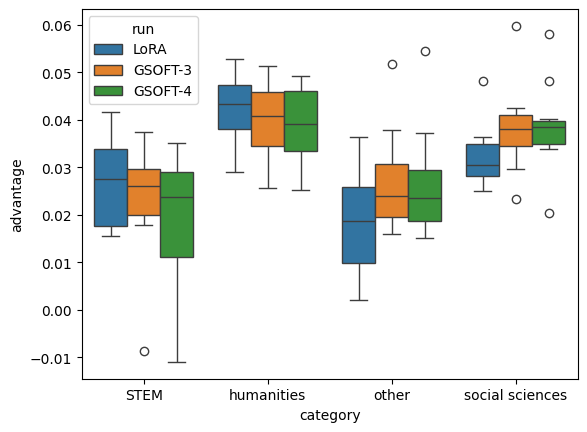

In [16]:
sns.boxplot(
    data=advantage_by_categories,
    y='advantage',
    x='category',
    hue='run',
    hue_order=['LoRA', 'GSOFT-3', 'GSOFT-4']
)

In [17]:
total_advantage_gb = advantage_df.drop(columns=['subject', 'category'])
total_advantage_gb = total_advantage_gb.groupby(
    by=['run', 'language'],
    as_index=False
)

total_advantage = total_advantage_gb['advantage'].sum()
total_advantage = total_advantage.astype({'advantage': float})
total_advantage.loc[:, 'advantage'] /= total_advantage_gb['total'].sum()['total']

total_advantage.head()

,run,language,advantage
0,GSOFT-3,AR_XY,0.049210
1,GSOFT-3,BN_BD,0.024996
2,GSOFT-3,DE_DE,0.028486
3,GSOFT-3,EN_US,0.020367
4,GSOFT-3,ES_LA,0.033186


<Axes: ylabel='advantage'>

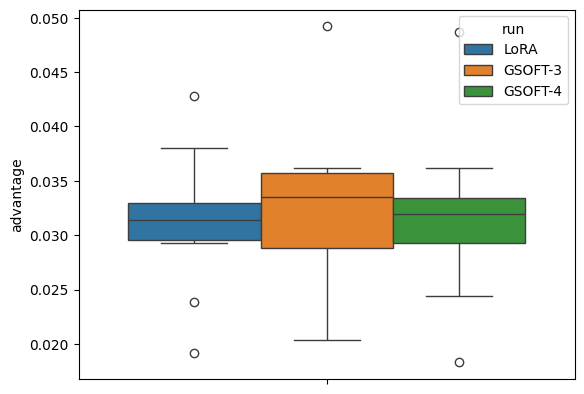

In [18]:
sns.boxplot(
    data=total_advantage,
    y='advantage',
    hue='run',
    hue_order=['LoRA', 'GSOFT-3', 'GSOFT-4']
)